# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [2]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2 
            "Dress",        # index 3 
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6 
            "Sneaker",      # index 7 
            "Bag",          # index 8 
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 1881
다음 그림은 Trouser 입니다.


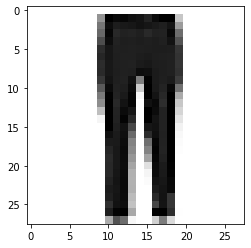

In [6]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [7]:
train_x = train_x / 255.
train_y = train_y / 255.

### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [8]:
train_x = train_x.reshape(-1, 28, 28, 1 )
test_x = test_x.reshape(-1, 28, 28, 1 )

### Y : One-Hot Encoding

In [9]:
train_x.shape

(60000, 28, 28, 1)

In [10]:
class_n = len(np.unique(train_y))

from tensorflow.keras.utils import to_categorical


train_y=to_categorical(train_y, class_n)
test_y=to_categorical(test_y, class_n)

train_x.shape, train_y.shape

((60000, 28, 28, 1), (60000, 10))

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [11]:
from keras.models import Sequential
from keras.layers import Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

In [13]:
# # 1. 세션 클리어 : 기존의 모델 구조가 남아있다면 지워줘!
# clear_session()

# # 2. 모델선언 + 3. 레이어 조립
# model = Sequential([Input(shape=(28,28,1)),
#                     Conv2D(filters=32,           # 사용한 필터의 수 or 새롭게 제작하려는 featrue map의 수
#                            kernel_size=(3,3),    # 필터의 가로 세로 사이즈
#                            strides=(1,1),        # 필터가 훑는 보폭 설정
#                            padding='same',       # 용도 1. feature map의 사이즈를 동일하게 유지하려고 용도 2. 외곽의 정보를 좀더 반영하려고  
#                            activation='relu'),   # 활성화 함수 설정 주의!!
#                     BatchNormalization(),
#                     Conv2D(filters=32,
#                            kernel_size=(3,3),
#                            strides=(1,1),
#                            padding='same',
#                            activation='relu'),
#                     BatchNormalization(),
#                     MaxPool2D(pool_size=(2,2),  # 풀링 필터의 가로 세로 사이즈
#                               strides=(2,2)),   # 풀링 필터의 보폭 설정 (default는 pool_size를 따름)


SyntaxError: ignored

In [14]:
model = Sequential([Input(shape=(28,28,1)),
                    
                    Conv2D(
                    filters = 32,
                    kernel_size=3,
                    padding='same',
                    activation='relu'),
                    BatchNormalization(),

                    Conv2D(
                    filters =32,
                    kernel_size=3, 
                    padding='same',
                    activation='relu'),
                    BatchNormalization(),
                    MaxPool2D(pool_size=2, strides=2),
                    Dropout(0.25),

                    Conv2D(
                    filters =64,
                    kernel_size=3,
                    padding='same',
                    activation='relu'),
                    BatchNormalization(),

                    Conv2D(
                    filters =64,
                    kernel_size=3,
                    padding='same',
                    activation='relu'),
                    BatchNormalization(),
                    MaxPool2D(pool_size=2, strides=2),
                    Dropout(0.25),

                    Flatten(),
                    Dense(512, activation='relu'),
                    BatchNormalization(),
                    Dense(10, activation='softmax')

])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', # 관측대상 : 무엇을 보고 얼리스토핑을 할지
patience = 5,
min_delta = 0,
verbose = 1,
restore_best_weights =True)


In [16]:
hist = model.fit(train_x, train_y, 
                 batch_size=128, 
                 epochs=1000,
                 verbose = 1,
                 validation_split=0.2, 
                 callbacks = [es])

Epoch 1/1000
375/375 [==============================] - 14s 16ms/step - loss: 0.2780 - accuracy: 0.9382 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2/1000
375/375 [==============================] - 6s 15ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 8.3444e-04 - val_accuracy: 1.0000
Epoch 3/1000
375/375 [==============================] - 6s 15ms/step - loss: 5.8051e-04 - accuracy: 1.0000 - val_loss: 3.8852e-04 - val_accuracy: 1.0000
Epoch 4/1000
375/375 [==============================] - 6s 16ms/step - loss: 3.0040e-04 - accuracy: 1.0000 - val_loss: 2.1362e-04 - val_accuracy: 1.0000
Epoch 5/1000
375/375 [==============================] - 6s 16ms/step - loss: 1.8105e-04 - accuracy: 1.0000 - val_loss: 1.3498e-04 - val_accuracy: 1.0000
Epoch 6/1000
375/375 [==============================] - 6s 16ms/step - loss: 1.1891e-04 - accuracy: 1.0000 - val_loss: 9.2072e-05 - val_accuracy: 1.0000
Epoch 7/1000
375/375 [==============================] - 6s 16ms/step - loss: 8.2500e-05 - acc

### 이미지 시각화

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['sparse_categorical_accuracy'])
plt.plot(hist.history['val_sparse_categorical_accuracy'])
plt.title('sparse_categorical_accuracy : Training vs Validation')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

KeyError: ignored

<Figure size 720x360 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
y_pred = model.predict(test_x)
y_pred.shape

In [ ]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

In [ ]:
single_y_pred[:3]

In [ ]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

In [ ]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()